<a href="https://colab.research.google.com/github/ToffertheCreator/colab_notebooks/blob/main/Hepatitis_prediction_ML%26NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/hepa_c.csv')

In [ ]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df.isnull().sum()

,0
Category,0
Age,0
Sex,0
ALB,0
ALP,0
ALT,0
AST,0
BIL,0
CHE,0
CHOL,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    int64  
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    int64  
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 62.6 KB


In [ ]:
df['Category']

,Category
0,0
1,0
2,0
3,0
4,0
...,...
610,4
611,4
612,4
613,4


In [ ]:
df = df.drop(['Sex'], axis=1)

In [ ]:
class_mapping = {'M': 0, 'F': 1}

# Map the class column
df['Gender'] = df['Gender'].map(class_mapping)

In [ ]:
value_counts_including_nan = df['Gender'].value_counts(dropna=False)

print(value_counts_including_nan)

Gender
0.0    566
1.0    434
Name: count, dtype: int64


In [ ]:
rows_with_nan = df[df.isna().any(axis=1)]

print(rows_with_nan)

Empty DataFrame
Columns: [Gender, AGE, Urea, Cr, HbA1c, Chol, TG, HDL, LDL, VLDL, BMI, CLASS]
Index: []


In [ ]:
X = df.drop('Category', axis=1)
y = df['Category']

In [ ]:
print(X.shape)
print(y.shape)

(615, 12)
(615,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df['Category'], test_size=0.1, random_state=42)

In [ ]:
nn_scaler = MinMaxScaler()
X_train_nn = nn_scaler.fit_transform(X_train)
X_test_nn = nn_scaler.transform(X_test)

In [ ]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import InputLayer, Dense
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(InputLayer(input_shape=(12,)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

#Output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.03), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 897 (3.50 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train_nn, y_train, validation_data=(X_test_nn, y_test), epochs=600)

Epoch 1/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3366 - loss: 0.7327 - val_accuracy: 0.8710 - val_loss: 0.2475
Epoch 2/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7038 - loss: 0.5051 - val_accuracy: 0.8710 - val_loss: -0.3393
Epoch 3/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7355 - loss: -0.2882 - val_accuracy: 0.8710 - val_loss: -1.3445
Epoch 4/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7084 - loss: -0.9119 - val_accuracy: 0.8710 - val_loss: -2.2660
Epoch 5/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6574 - loss: -1.4805 - val_accuracy: 0.7419 - val_loss: -4.8471
Epoch 6/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5916 - loss: -4.0248 - val_accuracy: 0.6452 - val_loss: -8.0299
Epoch 7/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5487 - loss: -5.6848 - val_accuracy: 0.6290 - val_loss: -11.8794
Epoch 8/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6738 - loss: -4.7545 - val_accura

KeyboardInterrupt: 

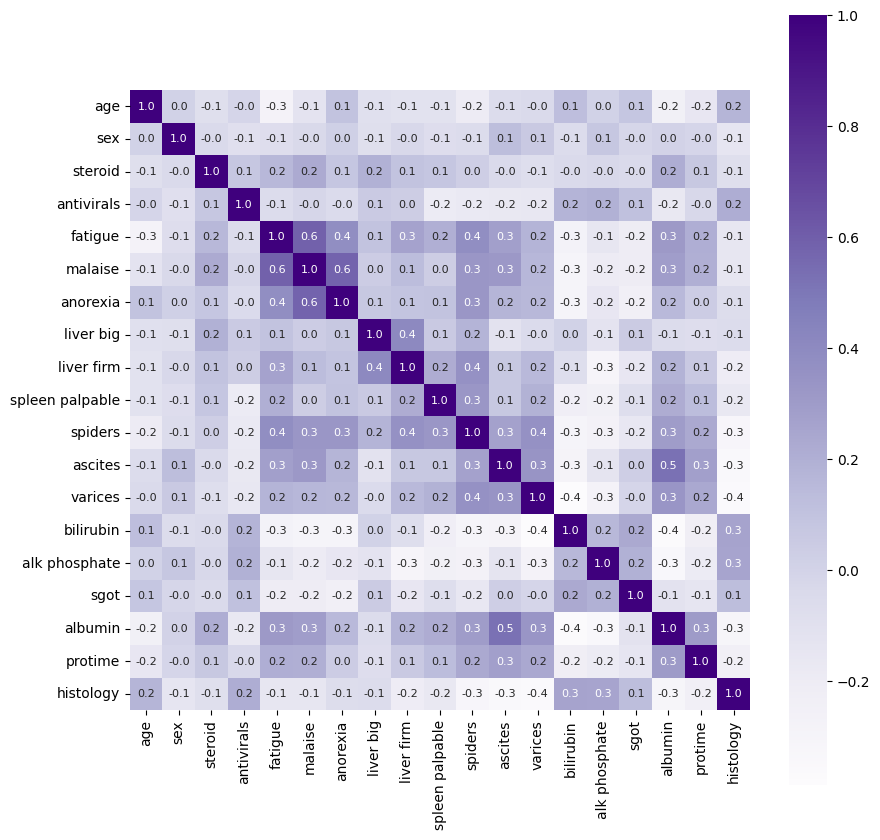

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dfcorr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(dfcorr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Purples')
plt.show()

In [ ]:
nn_predictions = model.predict(X_test_nn)
nn_predictions_binary = (nn_predictions > 0.5).astype(int)
print("Neural Network Accuracy:", accuracy_score(y_test, nn_predictions_binary))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Neural Network Accuracy: 0.7886178861788617


In [ ]:
model.save('stroke_nn.keras')

In [ ]:
nn_model = MLPClassifier(hidden_layer_sizes=(200, 400), max_iter=1000)
nn_model.fit(X_train_nn, y_train)
nn_predictions = nn_model.predict(X_test_nn)
print("Neural Network Accuracy:", accuracy_score(y_test, nn_predictions))


Neural Network Accuracy: 0.967741935483871


In [ ]:
import joblib

# Save the model to a file
joblib.dump(nn_model, 'hepaC_MLPnn_model.joblib')


['hepaC_MLPnn_model.joblib']

In [ ]:
lr_scaler = StandardScaler()
X_train_lr = lr_scaler.fit_transform(X_train)
X_test_lr = lr_scaler.transform(X_test)

lr_model = LogisticRegression()
lr_model.fit(X_train_lr, y_train)
lr_predictions = lr_model.predict(X_test_lr)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))

Logistic Regression Accuracy: 0.9516129032258065


In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

Random Forest Accuracy: 0.9516129032258065


In [ ]:
# Example input values for prediction
input_values = [[0.0,49,4.8,46,5.8,4.8,1.1,1.7,2.6,0.5,24.0]]  # Replace with actual values

# Make prediction
rf_predictions = rf_model.predict(input_values)
print("Prediction:", rf_predictions[0])

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0,
    reg_lambda=1,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Evaluate the model on the test set
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Model Accuracy:", xgb_accuracy)

XGBoost Model Accuracy: 0.9516129032258065


In [ ]:
xgb_model.save_model('hepaC_xgb_model.json')

In [ ]:
import joblib

# Assuming rf_model is your trained Random Forest model
joblib.dump(rf_model, 'diabetes_random_forest_model.joblib')

['diabetes_random_forest_model.joblib']

In [ ]:
import joblib

# Load the saved model
loaded_rf_model = joblib.load('/content/diabetes_random_forest_model.joblib')
input_val = [[1.0,35,3.3,44,5.0,4.1,1.9,4.0,1.3,0.7,23.0]]
# Use the loaded model to make predictions
predictions = loaded_rf_model.predict(input_val)
print("Prediction:", predictions[0])

Prediction: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**MANUAL INPUT NN**

In [ ]:
input_values = np.array([[15.22,30.62,103.4,716.9,0.1048,0.2087,0.255,0.09429,0.2128,0.07152,0.2602,1.205,2.362,22.65,0.004625,0.04844,0.07359,0.01608,0.02137,0.006142,17.52,42.79,128.7,915,0.1417,0.7917,1.17,0.2356,0.4089,0.1409]])

input_values_scaled = nn_scaler.transform(input_values)

nn_prediction = model.predict(input_values_scaled)
predicted_class = (nn_prediction > 0.5).astype(int)

print("Neural Network Prediction:", predicted_class[0][0])

# Make predictions on the test set for accuracy calculation
#nn_predictions_test = model.predict(X_test_nn)

# Calculate accuracy
#accuracy = accuracy_score(y_test, nn_predictions_test_class)
#print("Neural Network Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Neural Network Prediction: 1


In [ ]:
model.save('breast_cancer_neural_network.keras')

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model from the file
test_model = load_model('breast_cancer_neural_network.keras')

input_values = np.array([[15.22,30.62,103.4,716.9,0.1048,0.2087,0.255,0.09429,0.2128,0.07152,0.2602,1.205,2.362,22.65,0.004625,0.04844,0.07359,0.01608,0.02137,0.006142,17.52,42.79,128.7,915,0.1417,0.7917,1.17,0.2356,0.4089,0.1409]])

input_values_scaled = nn_scaler.transform(input_values)

nn_prediction = test_model.predict(input_values_scaled)

# For binary classification, you might want to threshold the prediction
predicted_class = (nn_prediction > 0.5).astype(int)  # Convert probability to binary class

print("Neural Network Prediction:", predicted_class[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Neural Network Prediction: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


****

**XGBOOST TEST**

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Load the model from a file
xgb_model_loaded = xgb.XGBClassifier()
xgb_model_loaded.load_model('/content/hepaC_xgb_model.json')

# Example input values for prediction; ensure they match the training data's feature preprocessing
input_values3 = [[49, 1, 40.97, 36.64, 106.02, 27.13, 33.72, 5.53, 6.93, 68.09, 61.23, 73.93]]

# Make a prediction for the new input
new_prediction = xgb_model_loaded.predict(input_values3)
print("Prediction for new input:", new_prediction[0])

# Now, make predictions on the entire test set (not with the single input_values3)
xgb_predictions_test = xgb_model_loaded.predict(X_test)

# Calculate accuracy on the test set
print("XGBoost Accuracy on Test Data:", accuracy_score(y_test, xgb_predictions_test))


Prediction for new input: 0
XGBoost Accuracy on Test Data: 0.9516129032258065


**MLP TEST**

In [ ]:
import joblib
import numpy as np
from sklearn.metrics import accuracy_score

# Load the saved model
loaded_nn_model = joblib.load('/content/hepaC_MLPnn_model.joblib')

# Example manual input values (ensure they are preprocessed as needed)
manual_input2 = [[49, 1, 40.97, 36.64, 106.02, 27.13, 33.72, 5.53, 6.93, 68.09, 61.23, 73.93]]

# Make predictions with the loaded model
nn_predictions = loaded_nn_model.predict(manual_input2)

# Print the prediction
print("Prediction for manual input:", nn_predictions[0])

# Optionally, evaluate the model on test data to check overall performance
# (Assuming X_test_nn and y_test are defined and preprocessed correctly)
nn_predictions_test = loaded_nn_model.predict(X_test_nn)
print("Neural Network Accuracy on Test Data:", accuracy_score(y_test, nn_predictions_test))


Prediction for manual input: 3
Neural Network Accuracy on Test Data: 0.967741935483871
